## Preparation

In [1]:
%load_ext watermark
%watermark  -d -u -a 'Christine Hou' -v -p numpy,scipy,matplotlib,sklearn

Author: Christine Hou

Last updated: 2021-11-27

Python implementation: CPython
Python version       : 3.9.2
IPython version      : 7.28.0

numpy     : 1.19.5
scipy     : 1.6.1
matplotlib: 3.3.4
sklearn   : 0.0



In [2]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


# Model Part 1 - Using Feature.csv

## Input

In [3]:
# feature.csv
X1 = pd.read_csv("~/Desktop/STAT 451/STAT_451_Final_Project/code/features.csv",header = None)
y1 = pd.read_csv("~/Desktop/STAT 451/STAT_451_Final_Project/code/labels.csv",header = None).values.ravel().astype(int)

print('X1.shape:', X1.shape)
print('y1.shape:', y1.shape)


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify = y1)

print('X1_train.shape:', X1_train.shape)
print('y1_train.shape:', y1_train.shape)
print('X1_test.shape:', X1_test.shape)
print('y1_test.shape:', y1_test.shape)

X1_train_sub, X1_valid, y1_train_sub, y1_valid = \
    train_test_split(X1_train, y1_train, test_size=0.2,\
                     random_state=1, stratify=y1_train)

print('X1_valid.shape:', X1_valid.shape)
print('y1_valid.shape:', y1_valid.shape)

X1.shape: (4559, 512)
y1.shape: (4559,)
X1_train.shape: (3191, 512)
y1_train.shape: (3191,)
X1_test.shape: (1368, 512)
y1_test.shape: (1368,)
X1_valid.shape: (639, 512)
y1_valid.shape: (639,)


## 1. KNN (Base Model)

Text(0, 0.5, 'Error rate')

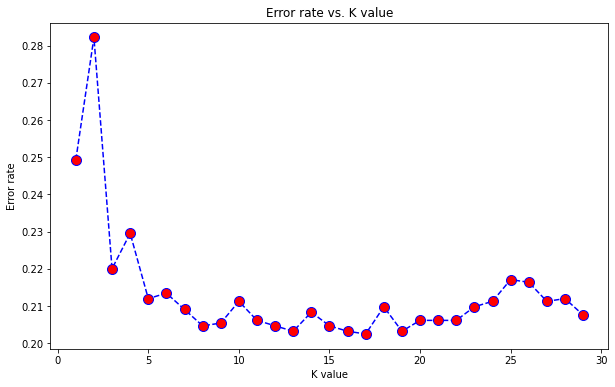

In [4]:
error = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    pred_i = knn.predict(X1_test)
    error.append(np.mean(pred_i != y1_test))

plt.figure(figsize = (10,6))
plt.plot(range(1,30),error,color = "blue",
        linestyle = "dashed",marker = "o",
        markerfacecolor = "red", markersize = 10)

plt.title("Error rate vs. K value")
plt.xlabel("K value")
plt.ylabel("Error rate")

In [5]:
# Find the index of minimum error in the error list
index = error.index(min(error))
k = index + 1
print(k)

17


In [6]:
# Find the k-value with lowest Error Rate - k
# for example, k = 3
knn_1 = KNeighborsClassifier(n_neighbors=k,
                             p =2,weights= "uniform")
knn_1.fit(X1_train,y1_train)
y_pred_test = knn_1.predict(X1_test)
print("Training Accuracy: %0.4f" % knn_1.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % knn_1.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % knn_1.score(X1_test, y1_test))

Training Accuracy: 0.8088
Validation Accuracy: 0.7966
Test Accuracy: 0.7975


## 2. Decision Tree

Original Decision Tree

In [7]:
tree = DecisionTreeClassifier(random_state=123)
tree.fit(X1_train, y1_train)
print("Training Accuracy: %0.4f" % tree.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % tree.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % tree.score(X1_test, y1_test))

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.8648


Tuning

In [8]:
params =  {
    'min_samples_split': scipy.stats.randint(2, 12),
    'min_impurity_decrease': scipy.stats.uniform(0.0, 0.5),
    'max_depth': [6, 16,18,20, None]
}


tree_new = RandomizedSearchCV(
    estimator=tree,
    param_distributions=params,
    n_iter=50,
    cv=10,
    verbose=2,
    n_jobs=1)

tree_new.fit(X1_train, y1_train)
tree_new.best_score_

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END max_depth=16, min_impurity_decrease=0.08885478512942102, min_samples_split=6; total time=   0.2s
[CV] END max_depth=16, min_impurity_decrease=0.08885478512942102, min_samples_split=6; total time=   0.2s
[CV] END max_depth=16, min_impurity_decrease=0.08885478512942102, min_samples_split=6; total time=   0.2s
[CV] END max_depth=16, min_impurity_decrease=0.08885478512942102, min_samples_split=6; total time=   0.2s
[CV] END max_depth=16, min_impurity_decrease=0.08885478512942102, min_samples_split=6; total time=   0.2s
[CV] END max_depth=16, min_impurity_decrease=0.08885478512942102, min_samples_split=6; total time=   0.2s
[CV] END max_depth=16, min_impurity_decrease=0.08885478512942102, min_samples_split=6; total time=   0.2s
[CV] END max_depth=16, min_impurity_decrease=0.08885478512942102, min_samples_split=6; total time=   0.2s
[CV] END max_depth=16, min_impurity_decrease=0.08885478512942102, min_samples_split=6; to

[CV] END max_depth=20, min_impurity_decrease=0.056140895260310686, min_samples_split=4; total time=   0.2s
[CV] END max_depth=20, min_impurity_decrease=0.056140895260310686, min_samples_split=4; total time=   0.2s
[CV] END max_depth=6, min_impurity_decrease=0.040568023256204344, min_samples_split=4; total time=   0.2s
[CV] END max_depth=6, min_impurity_decrease=0.040568023256204344, min_samples_split=4; total time=   0.2s
[CV] END max_depth=6, min_impurity_decrease=0.040568023256204344, min_samples_split=4; total time=   0.2s
[CV] END max_depth=6, min_impurity_decrease=0.040568023256204344, min_samples_split=4; total time=   0.2s
[CV] END max_depth=6, min_impurity_decrease=0.040568023256204344, min_samples_split=4; total time=   0.2s
[CV] END max_depth=6, min_impurity_decrease=0.040568023256204344, min_samples_split=4; total time=   0.2s
[CV] END max_depth=6, min_impurity_decrease=0.040568023256204344, min_samples_split=4; total time=   0.2s
[CV] END max_depth=6, min_impurity_decrease=

[CV] END max_depth=20, min_impurity_decrease=0.4519096425809313, min_samples_split=5; total time=   0.1s
[CV] END max_depth=20, min_impurity_decrease=0.4519096425809313, min_samples_split=5; total time=   0.1s
[CV] END max_depth=20, min_impurity_decrease=0.4519096425809313, min_samples_split=5; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.23822481097645426, min_samples_split=2; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.23822481097645426, min_samples_split=2; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.23822481097645426, min_samples_split=2; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.23822481097645426, min_samples_split=2; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.23822481097645426, min_samples_split=2; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.23822481097645426, min_samples_split=2; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.238224810

[CV] END max_depth=18, min_impurity_decrease=0.48267958288363116, min_samples_split=10; total time=   0.1s
[CV] END max_depth=18, min_impurity_decrease=0.48267958288363116, min_samples_split=10; total time=   0.1s
[CV] END max_depth=18, min_impurity_decrease=0.48267958288363116, min_samples_split=10; total time=   0.1s
[CV] END max_depth=18, min_impurity_decrease=0.48267958288363116, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, min_impurity_decrease=0.038255871066195546, min_samples_split=8; total time=   0.2s
[CV] END max_depth=None, min_impurity_decrease=0.038255871066195546, min_samples_split=8; total time=   0.2s
[CV] END max_depth=None, min_impurity_decrease=0.038255871066195546, min_samples_split=8; total time=   0.2s
[CV] END max_depth=None, min_impurity_decrease=0.038255871066195546, min_samples_split=8; total time=   0.2s
[CV] END max_depth=None, min_impurity_decrease=0.038255871066195546, min_samples_split=8; total time=   0.2s
[CV] END max_depth=None, mi

[CV] END max_depth=18, min_impurity_decrease=0.2280851012937123, min_samples_split=7; total time=   0.1s
[CV] END max_depth=18, min_impurity_decrease=0.2280851012937123, min_samples_split=7; total time=   0.1s
[CV] END max_depth=18, min_impurity_decrease=0.2280851012937123, min_samples_split=7; total time=   0.1s
[CV] END max_depth=18, min_impurity_decrease=0.2280851012937123, min_samples_split=7; total time=   0.1s
[CV] END max_depth=18, min_impurity_decrease=0.2280851012937123, min_samples_split=7; total time=   0.1s
[CV] END max_depth=18, min_impurity_decrease=0.2280851012937123, min_samples_split=7; total time=   0.1s
[CV] END max_depth=18, min_impurity_decrease=0.19731794580734202, min_samples_split=2; total time=   0.2s
[CV] END max_depth=18, min_impurity_decrease=0.19731794580734202, min_samples_split=2; total time=   0.2s
[CV] END max_depth=18, min_impurity_decrease=0.19731794580734202, min_samples_split=2; total time=   0.2s
[CV] END max_depth=18, min_impurity_decrease=0.19731

[CV] END max_depth=None, min_impurity_decrease=0.035452438539719466, min_samples_split=11; total time=   0.2s
[CV] END max_depth=None, min_impurity_decrease=0.035452438539719466, min_samples_split=11; total time=   0.2s
[CV] END max_depth=None, min_impurity_decrease=0.035452438539719466, min_samples_split=11; total time=   0.2s
[CV] END max_depth=None, min_impurity_decrease=0.035452438539719466, min_samples_split=11; total time=   0.2s
[CV] END max_depth=None, min_impurity_decrease=0.035452438539719466, min_samples_split=11; total time=   0.2s
[CV] END max_depth=None, min_impurity_decrease=0.035452438539719466, min_samples_split=11; total time=   0.2s
[CV] END max_depth=None, min_impurity_decrease=0.035452438539719466, min_samples_split=11; total time=   0.2s
[CV] END max_depth=None, min_impurity_decrease=0.035452438539719466, min_samples_split=11; total time=   0.2s
[CV] END max_depth=18, min_impurity_decrease=0.2887928538785192, min_samples_split=5; total time=   0.1s
[CV] END max_de

[CV] END max_depth=16, min_impurity_decrease=0.25251148856463196, min_samples_split=7; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.36363767308978917, min_samples_split=9; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.36363767308978917, min_samples_split=9; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.36363767308978917, min_samples_split=9; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.36363767308978917, min_samples_split=9; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.36363767308978917, min_samples_split=9; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.36363767308978917, min_samples_split=9; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.36363767308978917, min_samples_split=9; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.36363767308978917, min_samples_split=9; total time=   0.1s
[CV] END max_depth=6, min_impurity_decrease=0.36363767

0.8599177115987461

In [9]:
tree_new.best_params_

{'max_depth': None,
 'min_impurity_decrease': 0.01986493981364973,
 'min_samples_split': 9}

In [10]:
print("Training Accuracy: %0.4f" % tree_new.best_estimator_.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % tree_new.best_estimator_.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % tree_new.best_estimator_.score(X1_test, y1_test))

Training Accuracy: 0.8687
Validation Accuracy: 0.8795
Test Accuracy: 0.8721


## 3. Random Forest

Original Random Forest

In [11]:
forest = RandomForestClassifier(n_estimators=100,
                                random_state=123)

forest.fit(X1_train, y1_train)
    
print("Training Accuracy: %0.4f" % forest.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % forest.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % forest.score(X1_test, y1_test))

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.9072


Tuning

In [12]:
params =  {
    'min_samples_split': scipy.stats.randint(2, 12),
    'min_impurity_decrease': scipy.stats.uniform(0.0, 0.5),
    'max_depth': [6, 16,18,20, None]
}

forest_new = RandomizedSearchCV(
    estimator=forest,
    param_distributions=params,
    n_iter=50,
    cv=10,
    verbose=2,
    n_jobs=1)

forest_new.fit(X1_train, y1_train)

forest_new.best_score_

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END max_depth=18, min_impurity_decrease=0.06561250589306045, min_samples_split=2; total time=   0.6s
[CV] END max_depth=18, min_impurity_decrease=0.06561250589306045, min_samples_split=2; total time=   0.6s
[CV] END max_depth=18, min_impurity_decrease=0.06561250589306045, min_samples_split=2; total time=   0.5s
[CV] END max_depth=18, min_impurity_decrease=0.06561250589306045, min_samples_split=2; total time=   0.5s
[CV] END max_depth=18, min_impurity_decrease=0.06561250589306045, min_samples_split=2; total time=   0.6s
[CV] END max_depth=18, min_impurity_decrease=0.06561250589306045, min_samples_split=2; total time=   0.6s
[CV] END max_depth=18, min_impurity_decrease=0.06561250589306045, min_samples_split=2; total time=   0.5s
[CV] END max_depth=18, min_impurity_decrease=0.06561250589306045, min_samples_split=2; total time=   0.6s
[CV] END max_depth=18, min_impurity_decrease=0.06561250589306045, min_samples_split=2; to

[CV] END max_depth=None, min_impurity_decrease=0.4045948748293121, min_samples_split=2; total time=   0.4s
[CV] END max_depth=None, min_impurity_decrease=0.4045948748293121, min_samples_split=2; total time=   0.4s
[CV] END max_depth=None, min_impurity_decrease=0.4045948748293121, min_samples_split=2; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.3317029245920353, min_samples_split=11; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.3317029245920353, min_samples_split=11; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.3317029245920353, min_samples_split=11; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.3317029245920353, min_samples_split=11; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.3317029245920353, min_samples_split=11; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.3317029245920353, min_samples_split=11; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.331

[CV] END max_depth=20, min_impurity_decrease=0.0172495260373548, min_samples_split=11; total time=   0.8s
[CV] END max_depth=20, min_impurity_decrease=0.0172495260373548, min_samples_split=11; total time=   0.7s
[CV] END max_depth=20, min_impurity_decrease=0.0172495260373548, min_samples_split=11; total time=   0.9s
[CV] END max_depth=20, min_impurity_decrease=0.0172495260373548, min_samples_split=11; total time=   0.8s
[CV] END max_depth=20, min_impurity_decrease=0.0172495260373548, min_samples_split=11; total time=   0.7s
[CV] END max_depth=20, min_impurity_decrease=0.4267113717458815, min_samples_split=11; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.4267113717458815, min_samples_split=11; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.4267113717458815, min_samples_split=11; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.4267113717458815, min_samples_split=11; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0

[CV] END max_depth=20, min_impurity_decrease=0.4040829341561623, min_samples_split=2; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.4040829341561623, min_samples_split=2; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.4040829341561623, min_samples_split=2; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.4040829341561623, min_samples_split=2; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.4040829341561623, min_samples_split=2; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.4040829341561623, min_samples_split=2; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.4040829341561623, min_samples_split=2; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.2613868924123988, min_samples_split=5; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.2613868924123988, min_samples_split=5; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.26138689241

[CV] END max_depth=6, min_impurity_decrease=0.36698416320128907, min_samples_split=7; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.36698416320128907, min_samples_split=7; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.36698416320128907, min_samples_split=7; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.36698416320128907, min_samples_split=7; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.36698416320128907, min_samples_split=7; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.36698416320128907, min_samples_split=7; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.36698416320128907, min_samples_split=7; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.36698416320128907, min_samples_split=7; total time=   0.4s
[CV] END max_depth=6, min_impurity_decrease=0.36698416320128907, min_samples_split=7; total time=   0.4s
[CV] END max_depth=18, min_impurity_decrease=0.35086366

[CV] END max_depth=6, min_impurity_decrease=0.09143146835421284, min_samples_split=5; total time=   0.5s
[CV] END max_depth=None, min_impurity_decrease=0.07072138345691709, min_samples_split=9; total time=   0.6s
[CV] END max_depth=None, min_impurity_decrease=0.07072138345691709, min_samples_split=9; total time=   0.6s
[CV] END max_depth=None, min_impurity_decrease=0.07072138345691709, min_samples_split=9; total time=   0.6s
[CV] END max_depth=None, min_impurity_decrease=0.07072138345691709, min_samples_split=9; total time=   0.6s
[CV] END max_depth=None, min_impurity_decrease=0.07072138345691709, min_samples_split=9; total time=   0.6s
[CV] END max_depth=None, min_impurity_decrease=0.07072138345691709, min_samples_split=9; total time=   0.6s
[CV] END max_depth=None, min_impurity_decrease=0.07072138345691709, min_samples_split=9; total time=   0.6s
[CV] END max_depth=None, min_impurity_decrease=0.07072138345691709, min_samples_split=9; total time=   0.6s
[CV] END max_depth=None, min_im

[CV] END max_depth=16, min_impurity_decrease=0.33987943378788127, min_samples_split=11; total time=   0.4s
[CV] END max_depth=16, min_impurity_decrease=0.33987943378788127, min_samples_split=11; total time=   0.4s
[CV] END max_depth=16, min_impurity_decrease=0.33987943378788127, min_samples_split=11; total time=   0.4s
[CV] END max_depth=16, min_impurity_decrease=0.33987943378788127, min_samples_split=11; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.4526577967303855, min_samples_split=10; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.4526577967303855, min_samples_split=10; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.4526577967303855, min_samples_split=10; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.4526577967303855, min_samples_split=10; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.4526577967303855, min_samples_split=10; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrea

0.865874804075235

In [13]:
forest_new.best_params_

{'max_depth': 18,
 'min_impurity_decrease': 0.06561250589306045,
 'min_samples_split': 2}

In [15]:
print("Training Accuracy: %0.4f" % forest_new.best_estimator_.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % forest_new.best_estimator_.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % forest_new.best_estimator_.score(X1_test, y1_test))

Training Accuracy: 0.8687
Validation Accuracy: 0.8717
Test Accuracy: 0.8706


# Model Part 2 : Using raw_image.csv

## Input

In [16]:
# raw_images.csv
X2 = pd.read_csv("~/Desktop/STAT 451/STAT_451_Final_Project/code/raw_images.csv",header = None)
y2= pd.read_csv("~/Desktop/STAT 451/STAT_451_Final_Project/code/labels.csv",header = None).values.ravel().astype(int)

print('X2.shape:', X2.shape)
print('y2.shape:', y2.shape)


X2.shape: (4559, 30000)
y2.shape: (4559,)


In [17]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify = y2)

print('X2_train.shape:', X2_train.shape)
print('y2_train.shape:', y2_train.shape)
print('X2_test.shape:', X2_test.shape)
print('y2_test.shape:', y2_test.shape)

X2_train.shape: (3191, 30000)
y2_train.shape: (3191,)
X2_test.shape: (1368, 30000)
y2_test.shape: (1368,)


In [18]:
X2_train_sub, X2_valid, y2_train_sub, y2_valid = \
    train_test_split(X2_train, y2_train, test_size=0.2,\
                     random_state=1, stratify=y2_train)

print('X1_valid.shape:', X2_valid.shape)
print('y1_valid.shape:', y2_valid.shape)

X1_valid.shape: (639, 30000)
y1_valid.shape: (639,)


## 1. KNN (Base Model)

In [ ]:
error2 = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X2_train, y2_train)
    pred_i = knn.predict(X2_test)
    error2.append(np.mean(pred_i != y2_test))

plt.figure(figsize = (10,6))
plt.plot(range(1,30),error2,color = "blue",
        linestyle = "dashed",marker = "o",
        markerfacecolor = "red", markersize = 10)

plt.title("Error rate vs. K value")
plt.xlabel("K value")
plt.ylabel("Error rate")

In [14]:
# Find the index of minimum error in the error list
index2 = error2.index(min(error2))
k2 = index2 + 1
print(k2)

4


In [15]:
# Find the k-value with lowest Error Rate - k
# for example, k = 3
knn_2 = KNeighborsClassifier(n_neighbors=k2,
                             p =2,weights= "uniform")
knn_2.fit(X2_train,y2_train)
y_pred_test = knn_2.predict(X2_test)
print("Training Accuracy: %0.4f" % knn_2.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % knn_2.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % knn_2.score(X2_test, y2_test))

Training Accuracy: 0.9389
Validation Accuracy: 0.9327
Test Accuracy: 0.9196


## 2. Decision Tree

Original 

In [17]:
tree2 = DecisionTreeClassifier(random_state=123)
tree2.fit(X2_train, y2_train)
print("Training Accuracy: %0.4f" % tree2.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % tree2.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % tree2.score(X2_test, y2_test))

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.8787


Tuning

In [19]:
params =  {
    'min_samples_split': scipy.stats.randint(2, 12),
    'min_impurity_decrease': scipy.stats.uniform(0.0, 0.5),
    'max_depth': [6, 16,18,20, None]
}


tree_new2 = RandomizedSearchCV(
    estimator=tree2,
    param_distributions=params,
    n_iter=50,
    cv=10,
    verbose=2,
    n_jobs=1)

tree_new2.fit(X2_train, y2_train)
tree_new2.best_score_

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END max_depth=20, min_impurity_decrease=0.25863441651178176, min_samples_split=3; total time=   8.4s
[CV] END max_depth=20, min_impurity_decrease=0.25863441651178176, min_samples_split=3; total time=   6.1s
[CV] END max_depth=20, min_impurity_decrease=0.25863441651178176, min_samples_split=3; total time=   6.4s
[CV] END max_depth=20, min_impurity_decrease=0.25863441651178176, min_samples_split=3; total time=   6.4s
[CV] END max_depth=20, min_impurity_decrease=0.25863441651178176, min_samples_split=3; total time=   6.0s
[CV] END max_depth=20, min_impurity_decrease=0.25863441651178176, min_samples_split=3; total time=   6.0s
[CV] END max_depth=20, min_impurity_decrease=0.25863441651178176, min_samples_split=3; total time=   6.0s
[CV] END max_depth=20, min_impurity_decrease=0.25863441651178176, min_samples_split=3; total time=   6.0s
[CV] END max_depth=20, min_impurity_decrease=0.25863441651178176, min_samples_split=3; to

[CV] END max_depth=16, min_impurity_decrease=0.3748902258030372, min_samples_split=6; total time=   5.8s
[CV] END max_depth=16, min_impurity_decrease=0.3748902258030372, min_samples_split=6; total time=   5.7s
[CV] END max_depth=18, min_impurity_decrease=0.4333451671106066, min_samples_split=8; total time=   5.8s
[CV] END max_depth=18, min_impurity_decrease=0.4333451671106066, min_samples_split=8; total time=   5.8s
[CV] END max_depth=18, min_impurity_decrease=0.4333451671106066, min_samples_split=8; total time=   5.8s
[CV] END max_depth=18, min_impurity_decrease=0.4333451671106066, min_samples_split=8; total time=   5.9s
[CV] END max_depth=18, min_impurity_decrease=0.4333451671106066, min_samples_split=8; total time=   5.8s
[CV] END max_depth=18, min_impurity_decrease=0.4333451671106066, min_samples_split=8; total time=   5.7s
[CV] END max_depth=18, min_impurity_decrease=0.4333451671106066, min_samples_split=8; total time=   5.8s
[CV] END max_depth=18, min_impurity_decrease=0.43334516

[CV] END max_depth=18, min_impurity_decrease=0.14695297594326118, min_samples_split=4; total time=  15.6s
[CV] END max_depth=18, min_impurity_decrease=0.14695297594326118, min_samples_split=4; total time=  15.4s
[CV] END max_depth=18, min_impurity_decrease=0.14695297594326118, min_samples_split=4; total time=  15.3s
[CV] END max_depth=18, min_impurity_decrease=0.14695297594326118, min_samples_split=4; total time=  15.3s
[CV] END max_depth=16, min_impurity_decrease=0.23226746081787675, min_samples_split=4; total time=  11.4s
[CV] END max_depth=16, min_impurity_decrease=0.23226746081787675, min_samples_split=4; total time=  11.4s
[CV] END max_depth=16, min_impurity_decrease=0.23226746081787675, min_samples_split=4; total time=  11.3s
[CV] END max_depth=16, min_impurity_decrease=0.23226746081787675, min_samples_split=4; total time=  11.3s
[CV] END max_depth=16, min_impurity_decrease=0.23226746081787675, min_samples_split=4; total time=  11.3s
[CV] END max_depth=16, min_impurity_decrease=0

[CV] END max_depth=20, min_impurity_decrease=0.34857077811846493, min_samples_split=10; total time=   8.1s
[CV] END max_depth=20, min_impurity_decrease=0.34857077811846493, min_samples_split=10; total time=   7.5s
[CV] END max_depth=20, min_impurity_decrease=0.34857077811846493, min_samples_split=10; total time=   7.2s
[CV] END max_depth=20, min_impurity_decrease=0.34857077811846493, min_samples_split=10; total time=   7.5s
[CV] END max_depth=20, min_impurity_decrease=0.34857077811846493, min_samples_split=10; total time=   7.5s
[CV] END max_depth=20, min_impurity_decrease=0.34857077811846493, min_samples_split=10; total time=   5.8s
[CV] END max_depth=None, min_impurity_decrease=0.3043344328453869, min_samples_split=5; total time=   5.6s
[CV] END max_depth=None, min_impurity_decrease=0.3043344328453869, min_samples_split=5; total time=   5.8s
[CV] END max_depth=None, min_impurity_decrease=0.3043344328453869, min_samples_split=5; total time=   5.8s
[CV] END max_depth=None, min_impurity

[CV] END max_depth=None, min_impurity_decrease=0.1723444277665176, min_samples_split=5; total time=  14.5s
[CV] END max_depth=None, min_impurity_decrease=0.1723444277665176, min_samples_split=5; total time=  14.5s
[CV] END max_depth=None, min_impurity_decrease=0.1723444277665176, min_samples_split=5; total time=  14.4s
[CV] END max_depth=None, min_impurity_decrease=0.1723444277665176, min_samples_split=5; total time=  14.4s
[CV] END max_depth=None, min_impurity_decrease=0.1723444277665176, min_samples_split=5; total time=  14.5s
[CV] END max_depth=None, min_impurity_decrease=0.1723444277665176, min_samples_split=5; total time=  14.6s
[CV] END max_depth=None, min_impurity_decrease=0.1723444277665176, min_samples_split=5; total time=  14.5s
[CV] END max_depth=None, min_impurity_decrease=0.1723444277665176, min_samples_split=5; total time=  14.6s
[CV] END max_depth=None, min_impurity_decrease=0.44003603905286626, min_samples_split=7; total time=   6.9s
[CV] END max_depth=None, min_impurit

[CV] END max_depth=None, min_impurity_decrease=0.0015592295701168934, min_samples_split=2; total time=  47.4s
[CV] END max_depth=None, min_impurity_decrease=0.0015592295701168934, min_samples_split=2; total time=  52.9s
[CV] END max_depth=None, min_impurity_decrease=0.0015592295701168934, min_samples_split=2; total time=  40.4s
[CV] END max_depth=None, min_impurity_decrease=0.0015592295701168934, min_samples_split=2; total time=  42.9s
[CV] END max_depth=None, min_impurity_decrease=0.0015592295701168934, min_samples_split=2; total time=  43.3s
[CV] END max_depth=None, min_impurity_decrease=0.0015592295701168934, min_samples_split=2; total time=  41.5s
[CV] END max_depth=None, min_impurity_decrease=0.0015592295701168934, min_samples_split=2; total time=  38.8s
[CV] END max_depth=None, min_impurity_decrease=0.0015592295701168934, min_samples_split=2; total time=  36.9s
[CV] END max_depth=None, min_impurity_decrease=0.0015592295701168934, min_samples_split=2; total time=  52.3s
[CV] END m

[CV] END max_depth=None, min_impurity_decrease=0.34312668333628826, min_samples_split=4; total time=   6.2s
[CV] END max_depth=None, min_impurity_decrease=0.34312668333628826, min_samples_split=4; total time=   6.3s
[CV] END max_depth=20, min_impurity_decrease=0.03762041834247498, min_samples_split=8; total time=  18.3s
[CV] END max_depth=20, min_impurity_decrease=0.03762041834247498, min_samples_split=8; total time=  20.2s
[CV] END max_depth=20, min_impurity_decrease=0.03762041834247498, min_samples_split=8; total time=  16.9s
[CV] END max_depth=20, min_impurity_decrease=0.03762041834247498, min_samples_split=8; total time=  15.3s
[CV] END max_depth=20, min_impurity_decrease=0.03762041834247498, min_samples_split=8; total time=  15.0s
[CV] END max_depth=20, min_impurity_decrease=0.03762041834247498, min_samples_split=8; total time=  15.0s
[CV] END max_depth=20, min_impurity_decrease=0.03762041834247498, min_samples_split=8; total time=  14.9s
[CV] END max_depth=20, min_impurity_decrea

0.8959580721003135

In [21]:
tree_new2.best_params_
print("Training Accuracy: %0.4f" % tree_new2.best_estimator_.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % tree_new2.best_estimator_.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % tree_new2.best_estimator_.score(X2_test, y2_test))

Training Accuracy: 0.9727
Validation Accuracy: 0.9703
Test Accuracy: 0.9108


## 3. Random Forest

Original Random Forest

In [22]:
forest2 = RandomForestClassifier(n_estimators=100,
                                random_state=123)

forest2.fit(X2_train, y2_train)
    
print("Training Accuracy: %0.4f" % forest2.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % forest2.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % forest2.score(X2_test, y2_test))

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.9444


Tuning

In [24]:
params =  {
    'min_samples_split': scipy.stats.randint(2, 12),
    'min_impurity_decrease': scipy.stats.uniform(0.0, 0.5),
    'max_depth': [6, 16,18,20, None]
}

forest2_new = RandomizedSearchCV(
    estimator=forest2,
    param_distributions=params,
    n_iter=50,
    cv=10,
    verbose=2,
    n_jobs=1)

forest2_new.fit(X2_train, y2_train)

forest2_new.best_score_

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END max_depth=20, min_impurity_decrease=0.29702692981678464, min_samples_split=9; total time=   6.8s
[CV] END max_depth=20, min_impurity_decrease=0.29702692981678464, min_samples_split=9; total time=   5.1s
[CV] END max_depth=20, min_impurity_decrease=0.29702692981678464, min_samples_split=9; total time=   4.1s
[CV] END max_depth=20, min_impurity_decrease=0.29702692981678464, min_samples_split=9; total time=   4.3s
[CV] END max_depth=20, min_impurity_decrease=0.29702692981678464, min_samples_split=9; total time=   4.2s
[CV] END max_depth=20, min_impurity_decrease=0.29702692981678464, min_samples_split=9; total time=   4.8s
[CV] END max_depth=20, min_impurity_decrease=0.29702692981678464, min_samples_split=9; total time=   4.4s
[CV] END max_depth=20, min_impurity_decrease=0.29702692981678464, min_samples_split=9; total time=   4.2s
[CV] END max_depth=20, min_impurity_decrease=0.29702692981678464, min_samples_split=9; to

[CV] END max_depth=20, min_impurity_decrease=0.37054062115231257, min_samples_split=5; total time=   4.3s
[CV] END max_depth=20, min_impurity_decrease=0.37054062115231257, min_samples_split=5; total time=   4.3s
[CV] END max_depth=20, min_impurity_decrease=0.37054062115231257, min_samples_split=5; total time=   3.7s
[CV] END max_depth=6, min_impurity_decrease=0.25969772566952254, min_samples_split=3; total time=   3.2s
[CV] END max_depth=6, min_impurity_decrease=0.25969772566952254, min_samples_split=3; total time=   3.2s
[CV] END max_depth=6, min_impurity_decrease=0.25969772566952254, min_samples_split=3; total time=   3.2s
[CV] END max_depth=6, min_impurity_decrease=0.25969772566952254, min_samples_split=3; total time=   3.3s
[CV] END max_depth=6, min_impurity_decrease=0.25969772566952254, min_samples_split=3; total time=   3.2s
[CV] END max_depth=6, min_impurity_decrease=0.25969772566952254, min_samples_split=3; total time=   3.2s
[CV] END max_depth=6, min_impurity_decrease=0.259697

[CV] END max_depth=20, min_impurity_decrease=0.25221951310286145, min_samples_split=11; total time=   3.1s
[CV] END max_depth=20, min_impurity_decrease=0.25221951310286145, min_samples_split=11; total time=   3.2s
[CV] END max_depth=20, min_impurity_decrease=0.25221951310286145, min_samples_split=11; total time=   3.2s
[CV] END max_depth=20, min_impurity_decrease=0.25221951310286145, min_samples_split=11; total time=   3.1s
[CV] END max_depth=20, min_impurity_decrease=0.25221951310286145, min_samples_split=11; total time=   3.2s
[CV] END max_depth=20, min_impurity_decrease=0.25221951310286145, min_samples_split=11; total time=   3.2s
[CV] END max_depth=6, min_impurity_decrease=0.009226649344771742, min_samples_split=7; total time=   9.5s
[CV] END max_depth=6, min_impurity_decrease=0.009226649344771742, min_samples_split=7; total time=   9.5s
[CV] END max_depth=6, min_impurity_decrease=0.009226649344771742, min_samples_split=7; total time=   9.5s
[CV] END max_depth=6, min_impurity_decre

[CV] END max_depth=20, min_impurity_decrease=0.045067682184953606, min_samples_split=7; total time=  19.8s
[CV] END max_depth=20, min_impurity_decrease=0.045067682184953606, min_samples_split=7; total time=  20.1s
[CV] END max_depth=20, min_impurity_decrease=0.045067682184953606, min_samples_split=7; total time=  18.7s
[CV] END max_depth=20, min_impurity_decrease=0.045067682184953606, min_samples_split=7; total time=  18.0s
[CV] END max_depth=20, min_impurity_decrease=0.045067682184953606, min_samples_split=7; total time=  17.9s
[CV] END max_depth=20, min_impurity_decrease=0.045067682184953606, min_samples_split=7; total time=16.9min
[CV] END max_depth=20, min_impurity_decrease=0.045067682184953606, min_samples_split=7; total time=  18.9s
[CV] END max_depth=20, min_impurity_decrease=0.045067682184953606, min_samples_split=7; total time=17.4min
[CV] END max_depth=16, min_impurity_decrease=0.3642709218268122, min_samples_split=10; total time=   4.8s
[CV] END max_depth=16, min_impurity_de

[CV] END max_depth=16, min_impurity_decrease=0.018769590188078167, min_samples_split=6; total time=   7.5s
[CV] END max_depth=16, min_impurity_decrease=0.4531383162479144, min_samples_split=5; total time=   3.1s
[CV] END max_depth=16, min_impurity_decrease=0.4531383162479144, min_samples_split=5; total time=   3.1s
[CV] END max_depth=16, min_impurity_decrease=0.4531383162479144, min_samples_split=5; total time=   3.1s
[CV] END max_depth=16, min_impurity_decrease=0.4531383162479144, min_samples_split=5; total time=   3.1s
[CV] END max_depth=16, min_impurity_decrease=0.4531383162479144, min_samples_split=5; total time=   3.1s
[CV] END max_depth=16, min_impurity_decrease=0.4531383162479144, min_samples_split=5; total time=   3.1s
[CV] END max_depth=16, min_impurity_decrease=0.4531383162479144, min_samples_split=5; total time=   3.1s
[CV] END max_depth=16, min_impurity_decrease=0.4531383162479144, min_samples_split=5; total time=   3.3s
[CV] END max_depth=16, min_impurity_decrease=0.453138

[CV] END max_depth=16, min_impurity_decrease=0.32765041320065996, min_samples_split=11; total time=   3.1s
[CV] END max_depth=16, min_impurity_decrease=0.32765041320065996, min_samples_split=11; total time=   3.1s
[CV] END max_depth=16, min_impurity_decrease=0.32765041320065996, min_samples_split=11; total time=   3.1s
[CV] END max_depth=16, min_impurity_decrease=0.32765041320065996, min_samples_split=11; total time=   3.1s
[CV] END max_depth=None, min_impurity_decrease=0.29887763592099603, min_samples_split=7; total time=   3.1s
[CV] END max_depth=None, min_impurity_decrease=0.29887763592099603, min_samples_split=7; total time=   3.0s
[CV] END max_depth=None, min_impurity_decrease=0.29887763592099603, min_samples_split=7; total time=   3.1s
[CV] END max_depth=None, min_impurity_decrease=0.29887763592099603, min_samples_split=7; total time=   3.1s
[CV] END max_depth=None, min_impurity_decrease=0.29887763592099603, min_samples_split=7; total time=   3.1s
[CV] END max_depth=None, min_imp

[CV] END max_depth=6, min_impurity_decrease=0.09189023308865063, min_samples_split=8; total time=   6.4s
[CV] END max_depth=6, min_impurity_decrease=0.09189023308865063, min_samples_split=8; total time=   6.3s
[CV] END max_depth=6, min_impurity_decrease=0.09189023308865063, min_samples_split=8; total time=   6.3s
[CV] END max_depth=6, min_impurity_decrease=0.09189023308865063, min_samples_split=8; total time=   6.3s
[CV] END max_depth=6, min_impurity_decrease=0.09189023308865063, min_samples_split=8; total time=   6.4s
[CV] END max_depth=6, min_impurity_decrease=0.09189023308865063, min_samples_split=8; total time=   6.4s
[CV] END max_depth=6, min_impurity_decrease=0.09189023308865063, min_samples_split=8; total time=   6.3s
[CV] END max_depth=20, min_impurity_decrease=0.06234540370751834, min_samples_split=5; total time=   6.3s
[CV] END max_depth=20, min_impurity_decrease=0.06234540370751834, min_samples_split=5; total time=   6.4s
[CV] END max_depth=20, min_impurity_decrease=0.062345

0.9094327978056427

In [25]:
forest2_new.best_params_
print("Training Accuracy: %0.4f" % forest2_new.best_estimator_.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % forest2_new.best_estimator_.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % forest2_new.best_estimator_.score(X2_test, y2_test))

Training Accuracy: 0.9144
Validation Accuracy: 0.9108
Test Accuracy: 0.9145
